Laboratorio 1 - Marcela Ambrosio

In [247]:
#Llamo todas las librerías a utilizar en el laboratorio
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os #libreria para crear mis imagenes del problema 3

<h3>Problema 1:</h3>
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos: <br>
Si el parametro color vale 1, la imagen debe mostrar activos uncamente el color azul.<br>
Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.<br>
Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.<br>
Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y verde.<br>
Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y azul.<br>
Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

In [248]:
#Defino la función problema1 
def problema1(imagenOriginal, color):
    if color not in [1,2,3,10,20,30]: #valido el parametro de ingreso de lo contrario mostrará error
        raise ValueError("Parámetro no válido")
    
    imagen = np.copy(imagenOriginal) #genero una copia de la imagen sobre la cual trabajaré los cambios

    #la imagen ya viene en formato RGB
    if color not in (1, 20, 30):
        imagen[:, :, 2] = 0  # Desactivamos el canal azul
    if color not in(2, 10, 20) :
        imagen[:, :, 1] = 0  # Desactivamos el canal verde
    if color not in(3, 10, 30):
        imagen[:, :, 0] = 0  # Desactivamos el canal rojo


    return imagen

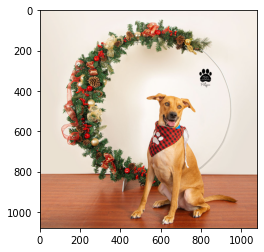

In [249]:
#asigno mi imagen a una variable
img = cv2.imread("test.jpg")
#muestro imagen original
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


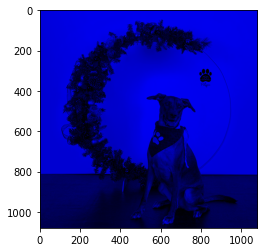

In [250]:
#Ejecuto la función y envío parámetros
img1 = problema1(img, color = 1)
plt.imshow(img1)
plt.show()

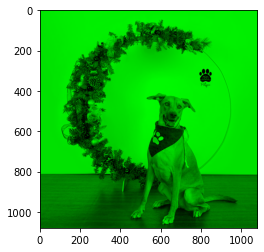

In [251]:
#Ejecuto la función y envío parámetros
img2 = problema1(img, color = 2)
plt.imshow(img2)
plt.show()


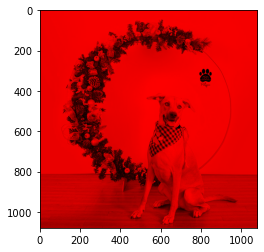

In [252]:
#Ejecuto la función y envío parámetros
img3 = problema1(img, 3)
plt.imshow(img3)
plt.show()


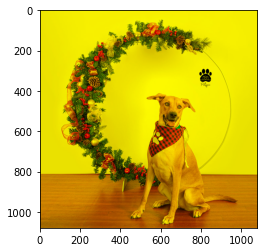

In [253]:
#Ejecuto la función y envío parámetros
img10 = problema1(img, 10)
plt.imshow(img10)
plt.show()


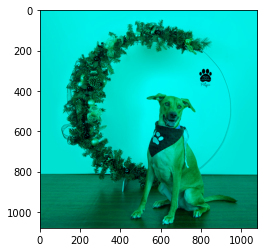

In [254]:
#Ejecuto la función y envío parámetros
img20 = problema1(img, 20)
plt.imshow(img20)
plt.show()


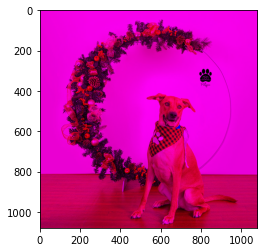

In [255]:
#Ejecuto la función y envío parámetros
img30 = problema1(img, 30)
plt.imshow(img30)
plt.show()


<h3>Problema2:</h3>
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color

In [256]:
#defino mi función

def reconstruccionImg(imgRed, imgGreen, imgBlue): #recibo como parámetros las 3 imagenes
    
    #asumiendo que las 3 imagenes tienen el mismo tamaño, lo combino en una matriz
    alto, ancho, canal = imgBlue.shape

    imgReconstruida = np.zeros((alto,ancho,3), dtype=np.uint8)
    
    #asigno las imagenes a cada uno de los colores, en este caso trabajo en una matriz RGB
    imgReconstruida[:, :, 0] = imgRed[:, :, 0]
    imgReconstruida[:, :, 1] = imgGreen[:, :, 1]
    imgReconstruida[:, :, 2] = imgBlue[:, :, 2]

    return imgReconstruida

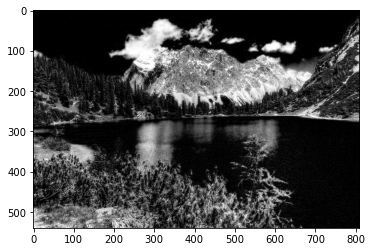

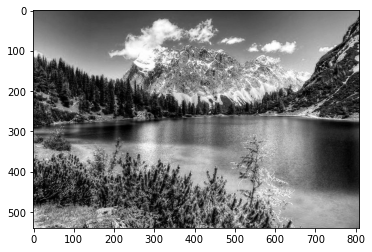

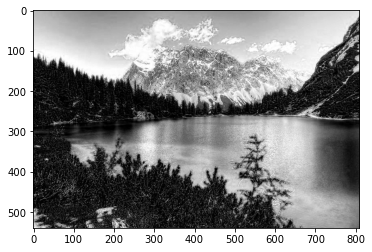

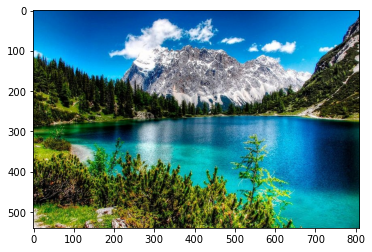

In [257]:
#asigno mis imagenes a diferentes variables

#imagen1
imgRed1 = cv2.imread("imagen1/imagen1_salida_gray_rojo.jpg")
imgGreen1 = cv2.imread("imagen1/imagen1_salida_gray_verde.jpg")
imgBlue1 = cv2.imread("imagen1/imagen1_salida_gray_azul.jpg")


#muestro conjunto de imagenes 1
plt.imshow(imgRed1)
plt.show()
plt.imshow(imgGreen1)
plt.show()
plt.imshow(imgBlue1)
plt.show()

#ejecuto mi reconstruccion

imagen1 = reconstruccionImg(imgRed1, imgGreen1, imgBlue1)
plt.imshow(imagen1)
plt.show()

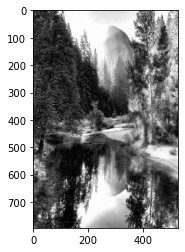

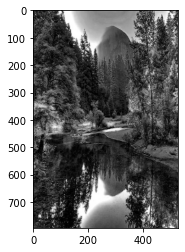

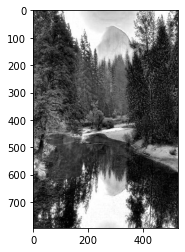

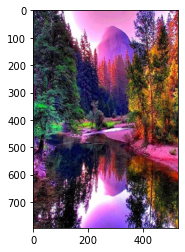

In [258]:
#asigno mis imagenes a diferentes variables

#imagen2
imgRed2 = cv2.imread("imagen2/imagen2_salida_gray_rojo.jpg")
imgGreen2 = cv2.imread("imagen2/imagen2_salida_gray_verde.jpg")
imgBlue2 = cv2.imread("imagen2/imagen2_salida_gray_azul.jpg")


#muestro conjunto de imagenes 1
plt.imshow(imgRed2)
plt.show()
plt.imshow(imgGreen2)
plt.show()
plt.imshow(imgBlue2)
plt.show()

#ejecuto mi reconstruccion

imagen2 = reconstruccionImg(imgRed2, imgGreen2, imgBlue2)
plt.imshow(imagen2)
plt.show()

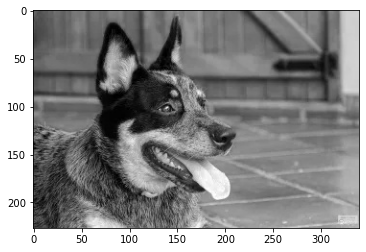

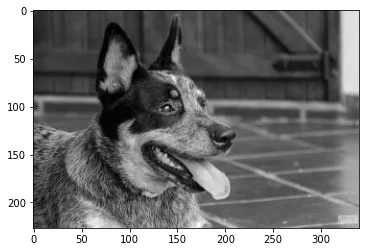

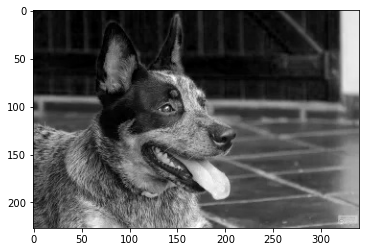

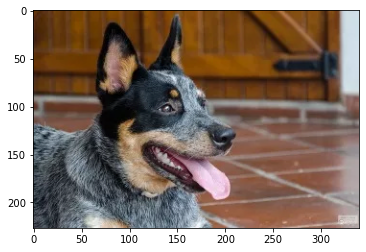

In [259]:
#asigno mis imagenes a diferentes variables

#imagen3
imgRed3 = cv2.imread("imagen3/perro_salida_gray_rojo.jpg")
imgGreen3 = cv2.imread("imagen3/perro_salida_gray_verde.jpg")
imgBlue3 = cv2.imread("imagen3/perro_salida_gray_azul.jpg")


#muestro conjunto de imagenes 1
plt.imshow(imgRed3)
plt.show()
plt.imshow(imgGreen3)
plt.show()
plt.imshow(imgBlue3)
plt.show()

#ejecuto mi reconstruccion

imagen3 = reconstruccionImg(imgRed3, imgGreen3, imgBlue3)
plt.imshow(imagen3)
plt.show()

<h3>Problema 3:</h3>
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2

In [260]:
#defino la función para crear una imagen a escala de grises
def crearEscalaGrises3D (imagen, pathDestino):
    
    #Asigno un valor ponderado por canal segun valores típicos
    pesoRojo = 0.299
    pesoVerde = 0.587
    pesoAzul = 0.114

    # Convertir la imagen a escala de grises para cada canal
    canalRojo =np.dot(imagen[..., :3], [pesoRojo, pesoVerde, pesoAzul]).astype(np.uint8)
    canalVerde = np.dot(imagen[..., :3], [pesoVerde, pesoRojo, pesoAzul]).astype(np.uint8)
    canalAzul =  np.dot(imagen[..., :3], [pesoAzul, pesoVerde, pesoRojo]).astype(np.uint8)



    cv2.imwrite(os.path.join(pathDestino, 'problema3_rojo.jpg'), canalRojo)
    cv2.imwrite(os.path.join(pathDestino, 'problema3_verde.jpg'), canalVerde)
    cv2.imwrite(os.path.join(pathDestino, 'problema3_azul.jpg'), canalAzul)



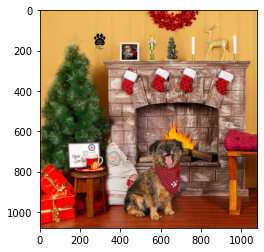

In [261]:
imgProblema3 = cv2.imread("problema3.jpg")

#muestro imagen original
plt.imshow(cv2.cvtColor(imgProblema3, cv2.COLOR_BGR2RGB))
plt.show()

In [262]:
#genero imagenes en escala de gris según el canal

carpetadestino="problema3/"
crearEscalaGrises3D (imgProblema3, carpetadestino)

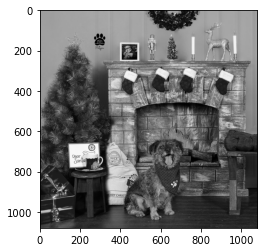

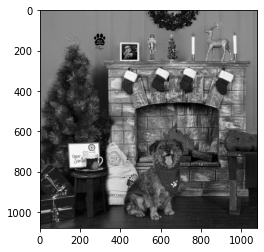

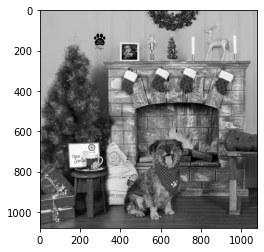

In [263]:
#ValidoResultado
imagenRojo = cv2.imread("problema3/problema3_rojo.jpg")
imagenVerde = cv2.imread("problema3/problema3_verde.jpg")
imagenAzul = cv2.imread("problema3/problema3_azul.jpg")

plt.imshow(imagenRojo)
plt.show()
plt.imshow(imagenVerde)
plt.show()
plt.imshow(imagenAzul)
plt.show()

<h3>Problema 4:</h3>
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribucion

In [264]:
#Creo función histograma

def histograma (imagen):
    
    # Se crea un histograma para cada canal
    hist_rojo = np.zeros(256, dtype=int)
    hist_verde = np.zeros(256, dtype=int)
    hist_azul = np.zeros(256, dtype=int)
    hist_gris = np.zeros(256, dtype=int)

    # Recorro la imagen para inicial el proceso de asignación delos valores
    for fila in imagen:
        for pixel in fila:
            rojo, verde, azul = pixel

            # Calculamos el promedio aritmético
            promedio_gris = (rojo + verde + azul) // 3

            # Incrementamos los contadores del histograma para cada canal de color y escala de grises
            hist_rojo[rojo] += 1
            hist_verde[verde] += 1
            hist_azul[azul] += 1
            hist_gris[promedio_gris] += 1

    # Calculamos la media de la distribución para cada canal de color y el histograma en escala de grises
    media_rojo = np.mean(np.arange(256) * hist_rojo) / np.sum(hist_rojo)
    media_verde = np.mean(np.arange(256) * hist_verde) / np.sum(hist_verde)
    media_azul = np.mean(np.arange(256) * hist_azul) / np.sum(hist_azul)
    media_gris = np.mean(np.arange(256) * hist_gris) / np.sum(hist_gris)

    # Histograma canal rojo
    plt.bar(np.arange(256), hist_rojo, color='red', alpha=0.7)
    plt.axvline(x=media_rojo, color='darkred', linestyle='dashed', label="Media:" + str(media_rojo))
    plt.title('Histograma Rojo')
    plt.xlabel('Valor de Píxel')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()    

    # Histograma canal verde

    plt.bar(np.arange(256), hist_verde, color='green', alpha=0.7)
    plt.axvline(x=media_verde, color='darkgreen', linestyle='dashed', linewidth=1, label="Media:" + str(media_verde))
    plt.title('Histograma Verde')
    plt.xlabel('Valor de Píxel')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()    

    # Histograma canal azul
    plt.bar(np.arange(256), hist_azul, color='blue', alpha=0.7)
    plt.axvline(x=media_azul, color='darkblue', linestyle='dashed', linewidth=1, label="Media:" + str(media_azul))
    plt.title('Histograma Azul')
    plt.xlabel('Valor de Píxel')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()    
    
    # Histograma escala de grises
    plt.bar(np.arange(256), hist_gris, color='gray', alpha=0.7)
    plt.axvline(x=media_gris, color='black', linestyle='dashed', linewidth=1, label="Media:" + str(media_azul))
    plt.title('Histograma Escala de Grises')
    plt.xlabel('Valor de Píxel')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()    

<ipython-input-264-b638c85872f2>:17: RuntimeWarning: overflow encountered in ubyte_scalars
  promedio_gris = (rojo + verde + azul) // 3


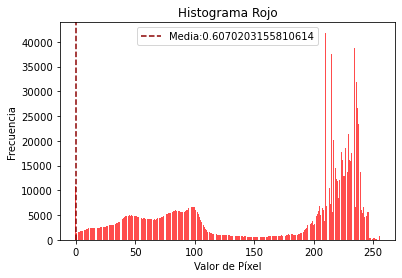

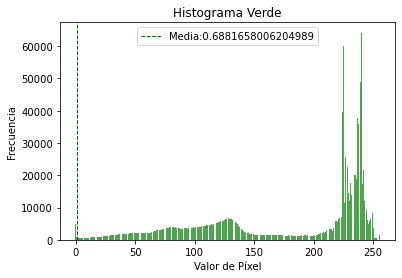

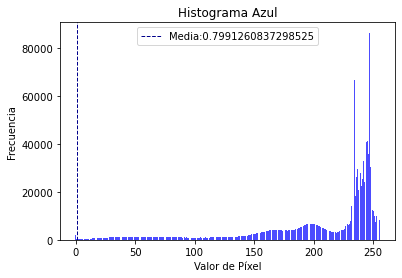

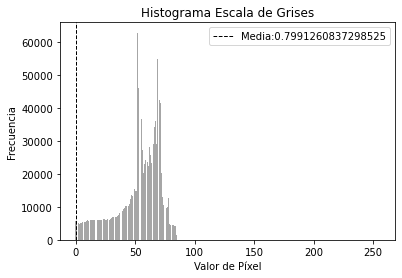

In [265]:
imagenPrueba= cv2.imread("test.jpg")

histograma(imagenPrueba)